In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

## Cluster Summary

In [2]:
cell_tidy_data = pd.read_msgpack('/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg')


/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'Replicate'],
      dtype='object')

In [4]:
cell_tidy_data.head()

,AllcPath,CCC_Rate,CG_Rate,CG_RateAdj,CH_Rate,CH_RateAdj,FinalReads,InputReads,MappedReads,Region,...,MajorRegion,SubRegion,DetailRegion,PotentialOverlap (MMB),Anterior (CCF coords),Posterior (CCF coords),MajorRegionColor,SubRegionColor,DissectionRegionColor,Replicate
10E_M_0,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.008198,0.822633,0.821166,0.041640,0.033718,1626504.0,4407752,2892347.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_1,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006019,0.743035,0.741479,0.024127,0.018218,2009998.0,5524084,3657352.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_10,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006569,0.750172,0.748520,0.027665,0.021235,1383636.0,3455260,2172987.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_101,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006353,0.760898,0.759369,0.026547,0.020323,2474670.0,7245482,4778768.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_102,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.005409,0.752980,0.751637,0.019497,0.014164,2430290.0,7004754,4609570.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625


## Palette

In [5]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

## UMAP color by brain dissection region, label by major types

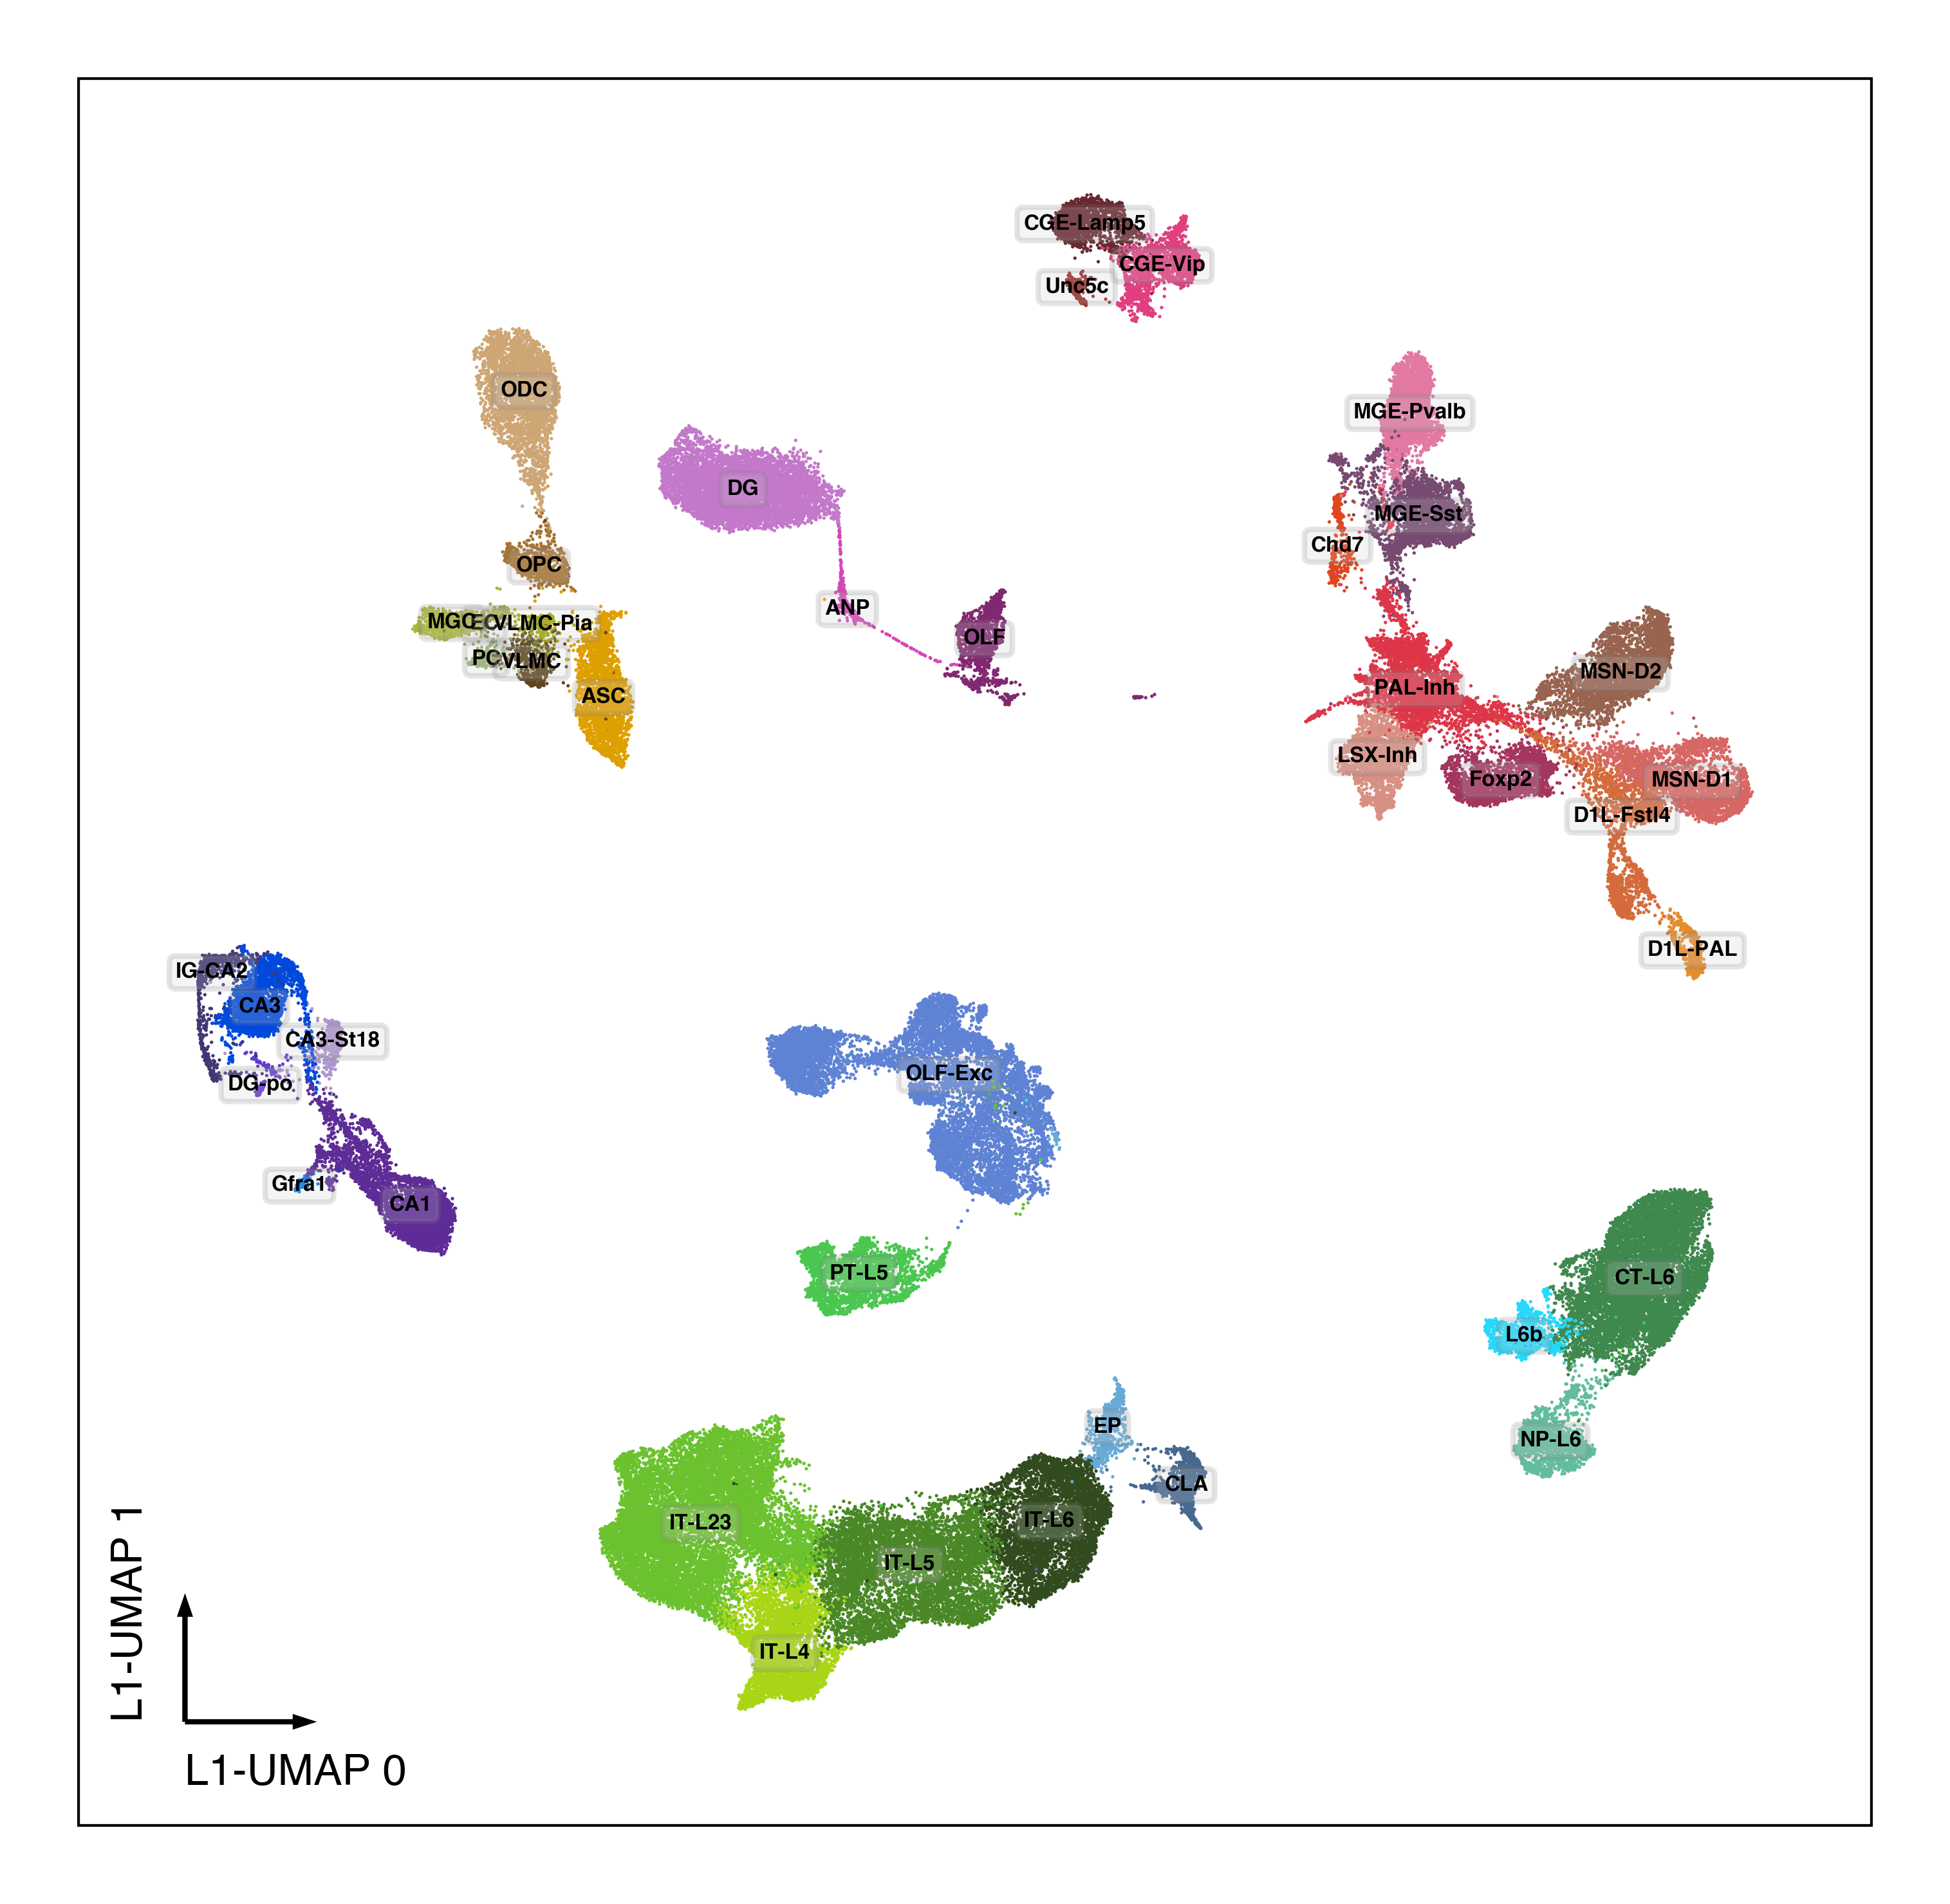

In [7]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l1-umap',
                    hue='MajorType',
                    palette=major_type_palette,
                    s=0.1,
                    max_points=None,
                    text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
pass

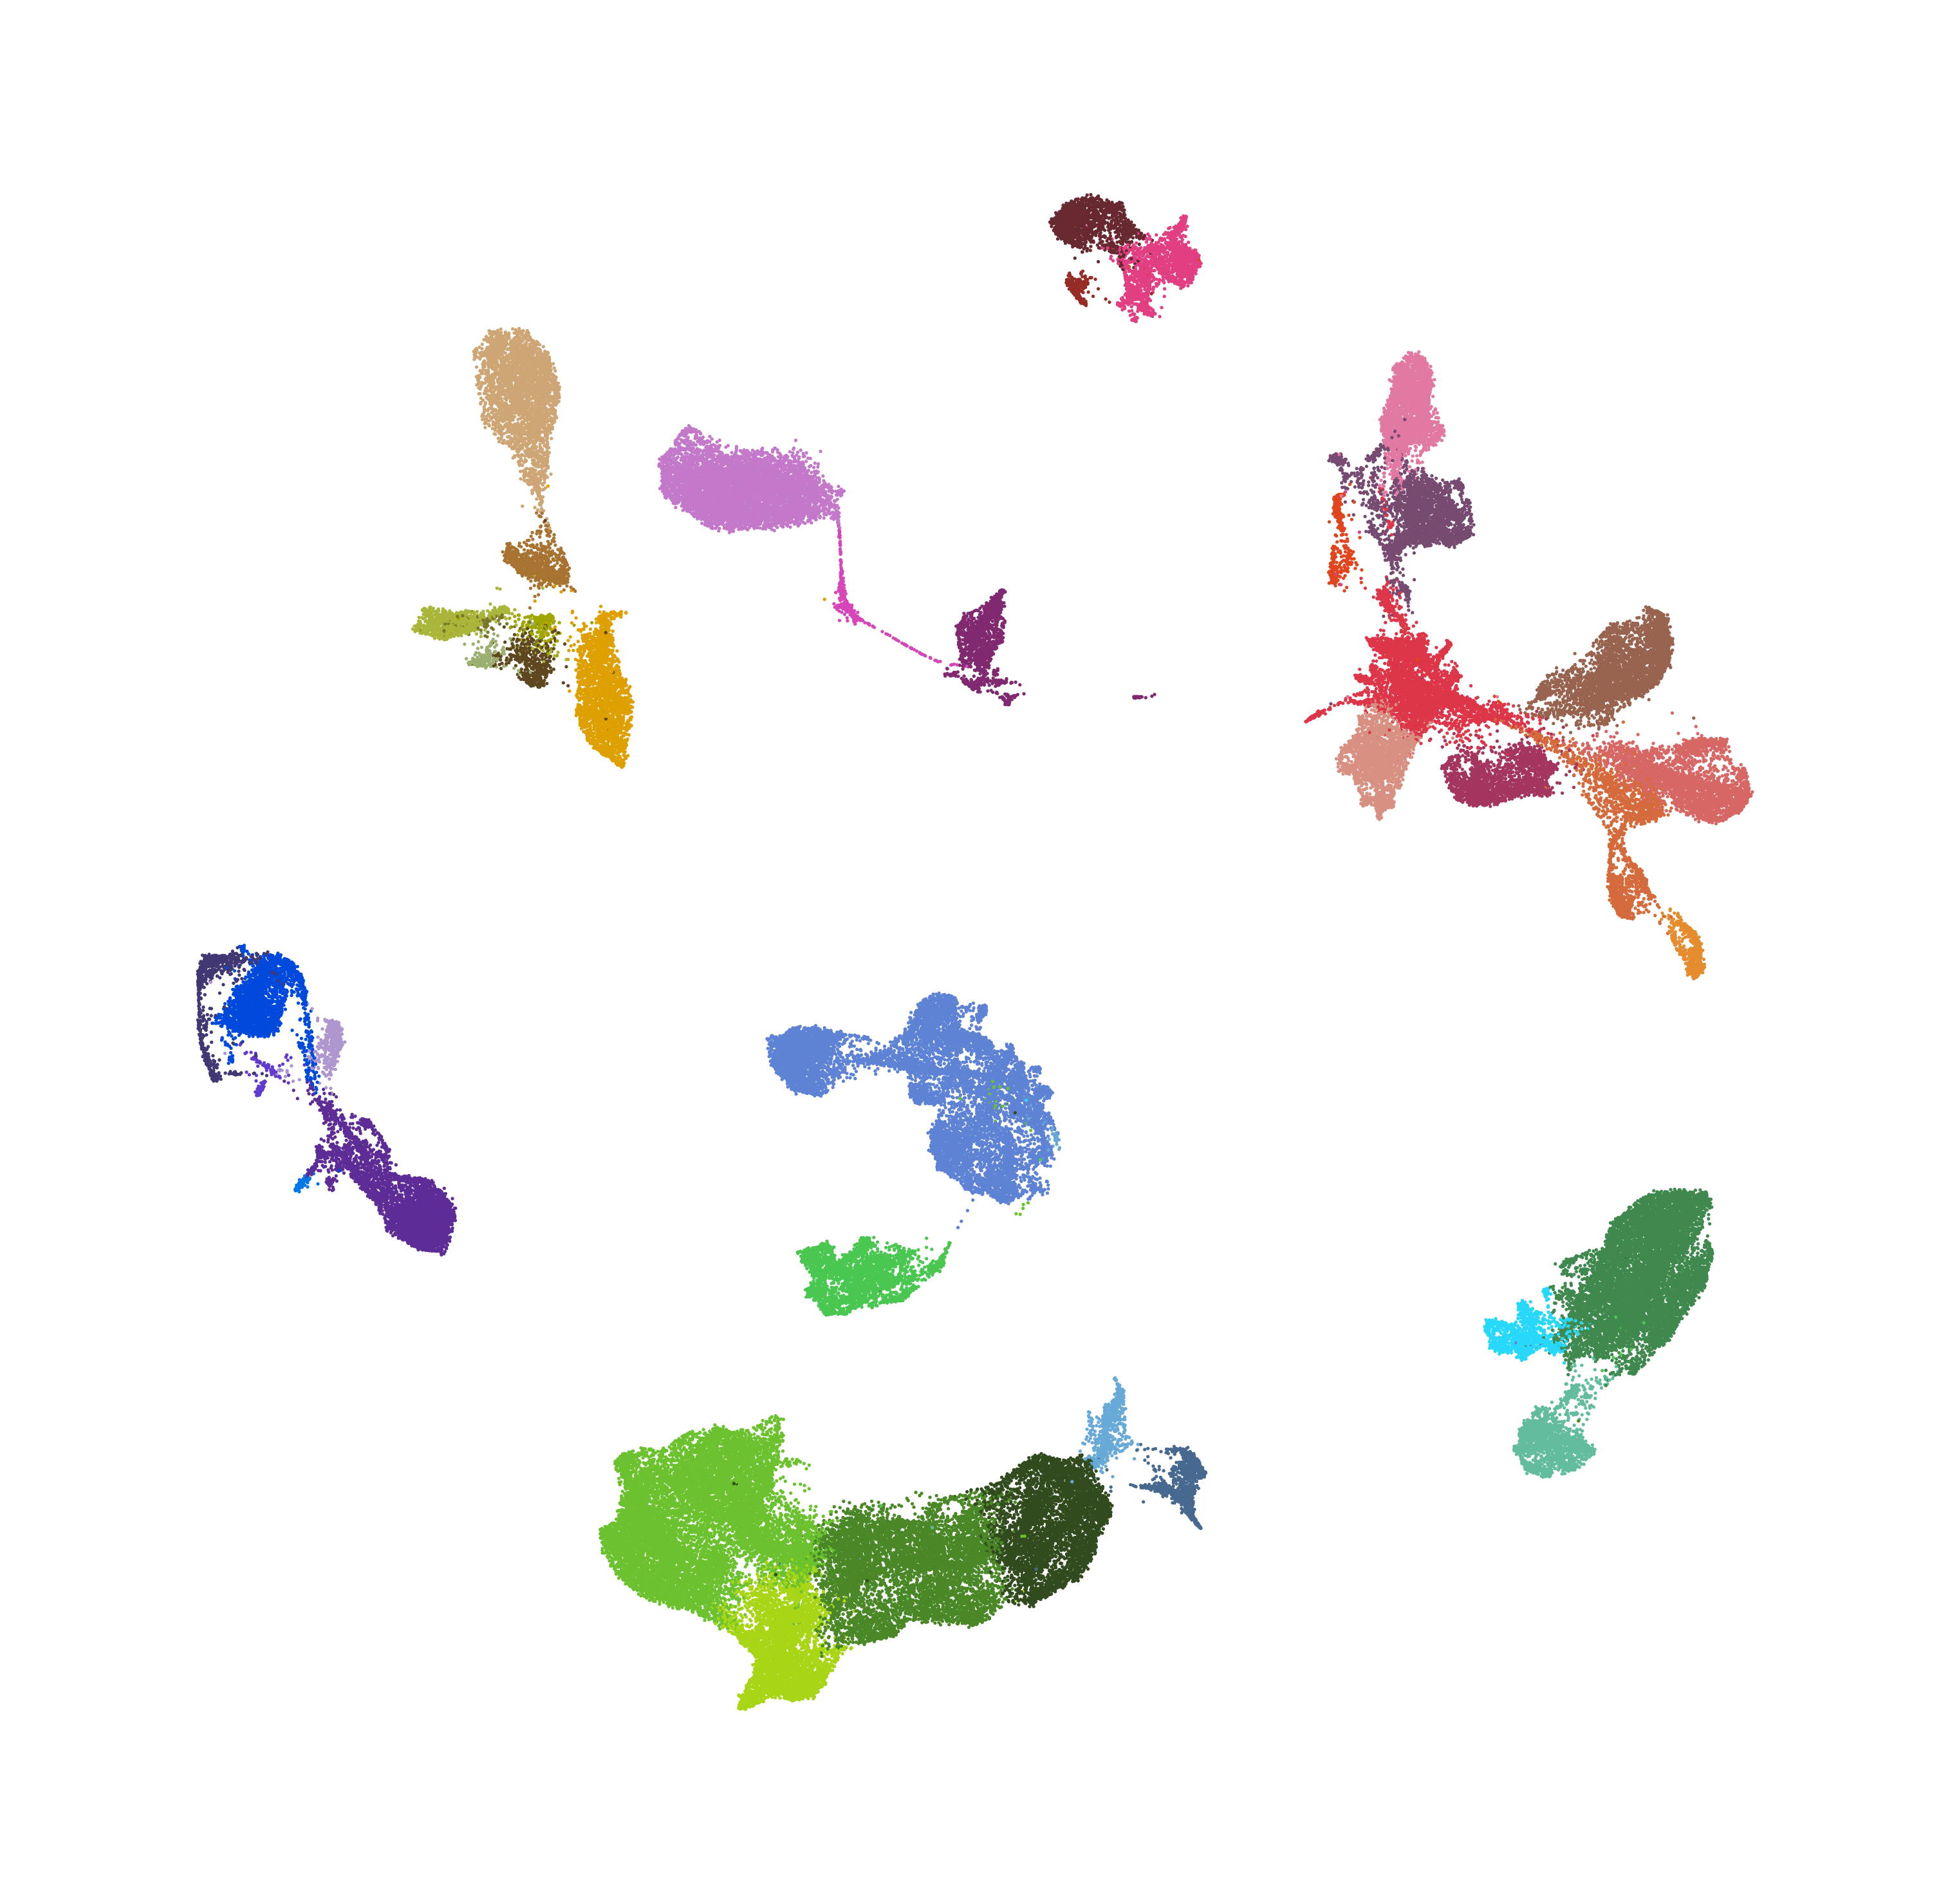

In [8]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l1-umap',
                    hue='MajorType',
                    palette=major_type_palette,
                    s=0.1,
                    max_points=None,
                    text_anno=None, 
                    axis_format=None)
fig.savefig('L1-UMAP_color_by_major_type.scatter_part.png')
pass

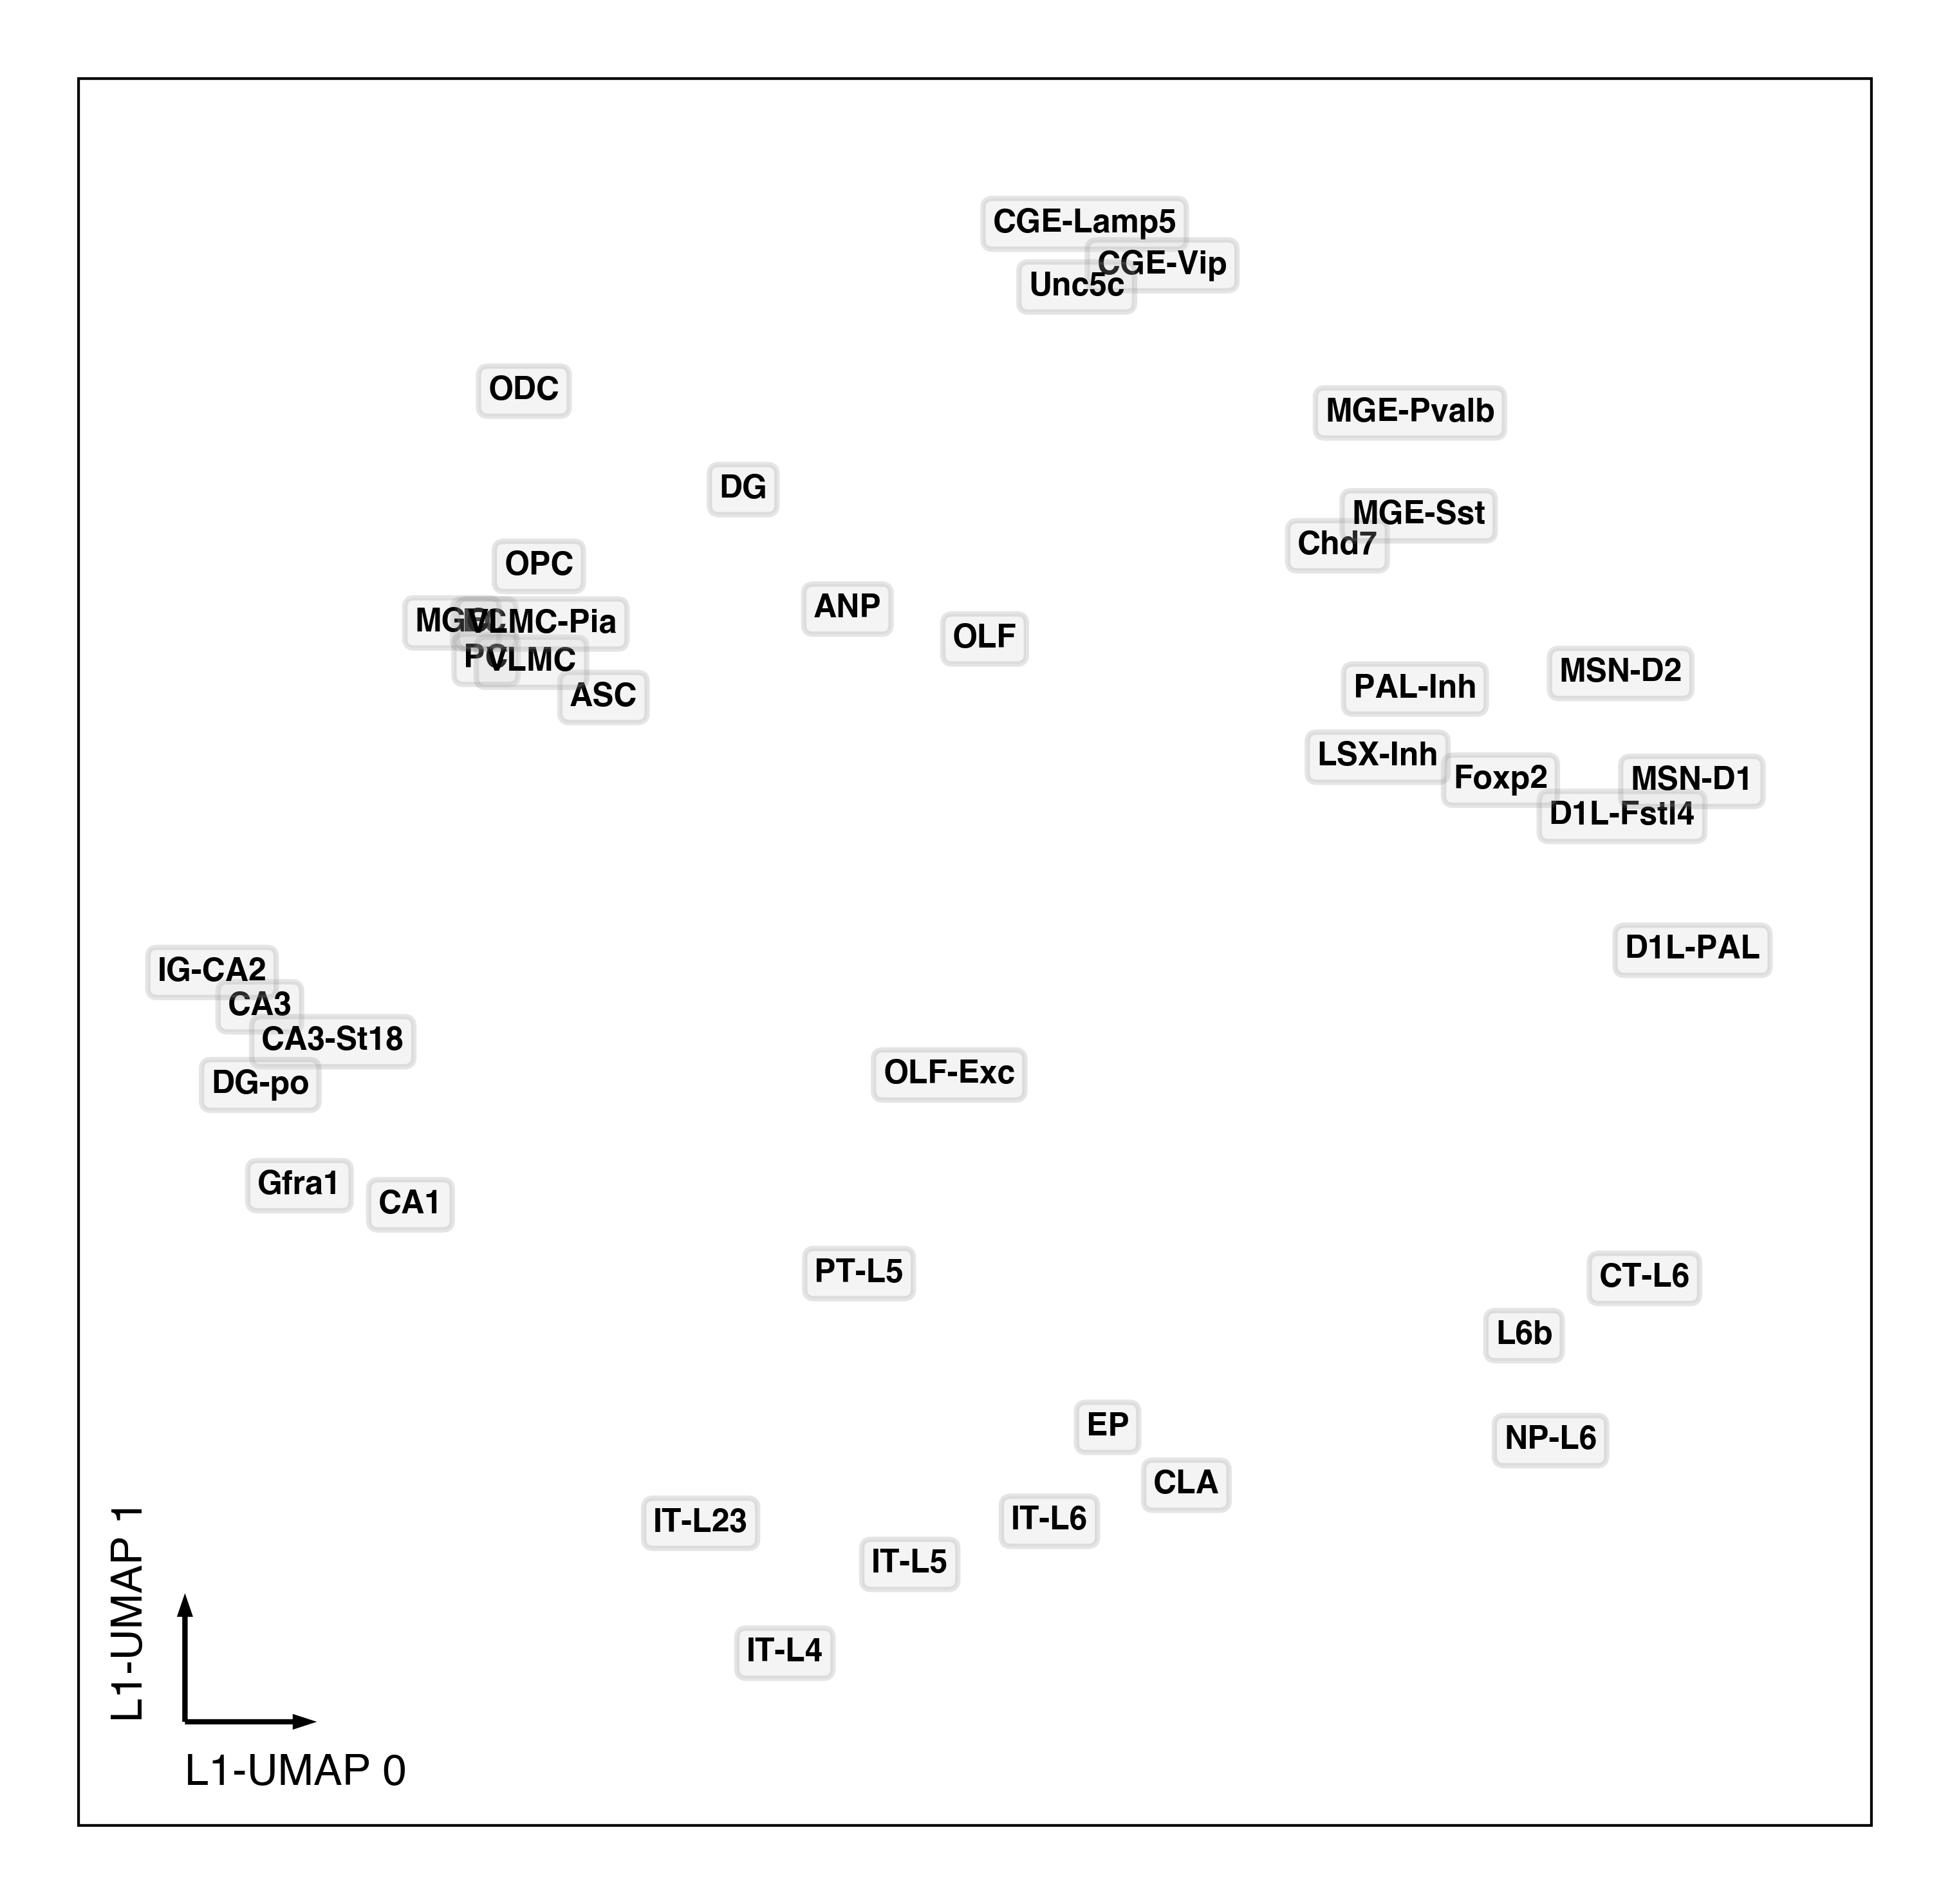

In [9]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l1-umap',
                    hue='MajorType',
                    palette=major_type_palette,
                    s=0.1,
                    max_points=None,
                    text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=3))

add_ax_box(ax, linewidth=0.5)

ax.collections[0].remove()

fig.savefig('L1-UMAP_color_by_major_type.label_part.pdf')
pass